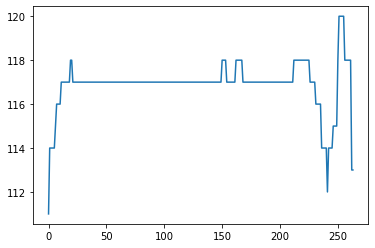

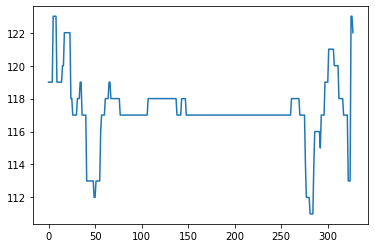

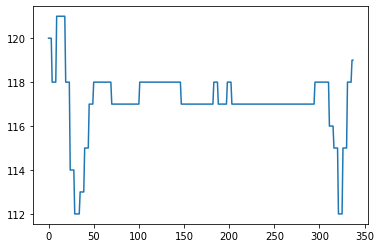

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import draw
from tkinter.filedialog import askopenfilename, askdirectory


# Actual mouse callback function
def print_coords(event, x, y, flags, param):

    # Global variables needed
    global image, image_copy, r_start, c_start

    # If left mouse button is clicked, start of line
    if (event == cv2.EVENT_LBUTTONDOWN):
        r_start = x
        c_start = y

    # If left mouse button is clicked, end of line; plot intensity profile
    if (event == cv2.EVENT_LBUTTONUP):
        r_end = x
        c_end = y
        image = cv2.line(image_copy.copy(), (r_start, c_start), (r_end, c_end), (255, 255, 255), 2)
        line = np.transpose(np.array(draw.line(r_start, c_start, r_end, c_end)))
        data = image_copy.copy()[line[:, 1], line[:, 0], :]
        plt.close()
        plt.figure('Intensity profile')
        plt.plot(data[:, 1])
        plt.draw()
        plt.pause(0.001)
        plt.legend(['color'])
        plt.ylim((0, 255))

# Read an image
image = cv2.imread(askopenfilename(), -1)
image_copy = image.copy()

# Set up window and mouse callback function
cv2.namedWindow("image")
cv2.setMouseCallback("image", print_coords)

# Loop until the 'c' key is pressed
while True:

    # Display image; wait for keypress
    cv2.imshow("image", image)
    key = cv2.waitKey(1) & 0xFF

    # If 'c' key is pressed, break from loop
    if  key == ord("c"):
        break

cv2.destroyAllWindows()